In [36]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
power_on_hours_at_failure = []
for month in [10, 11, 12]:
    for day in range(1, 32):
        print(f"Reading: 2018-{month}-{day:02d}")
        try:
            data = pd.read_csv(f"/home/dslochower/Downloads/data_Q4_2018/2018-{month}-{day:02d}.csv")
        except:
            continue
        seagate_4tb = data[data.model.str.contains("ST4000")]
        failures = seagate_4tb[seagate_4tb.failure == 1]

        if len(failures) > 1:
            for index, row in failures.iterrows():
                power_on_hours_at_failure.append(float(row.smart_9_raw))


Reading: 2018-10-01
Reading: 2018-10-02
Reading: 2018-10-03
Reading: 2018-10-04
Reading: 2018-10-05
Reading: 2018-10-06
Reading: 2018-10-07
Reading: 2018-10-08
Reading: 2018-10-09
Reading: 2018-10-10
Reading: 2018-10-11
Reading: 2018-10-12
Reading: 2018-10-13
Reading: 2018-10-14
Reading: 2018-10-15
Reading: 2018-10-16
Reading: 2018-10-17
Reading: 2018-10-18
Reading: 2018-10-19
Reading: 2018-10-20
Reading: 2018-10-21
Reading: 2018-10-22
Reading: 2018-10-23
Reading: 2018-10-24
Reading: 2018-10-25
Reading: 2018-10-26
Reading: 2018-10-27
Reading: 2018-10-28
Reading: 2018-10-29
Reading: 2018-10-30
Reading: 2018-10-31
Reading: 2018-11-01
Reading: 2018-11-02
Reading: 2018-11-03
Reading: 2018-11-04
Reading: 2018-11-05
Reading: 2018-11-06
Reading: 2018-11-07
Reading: 2018-11-08
Reading: 2018-11-09
Reading: 2018-11-10
Reading: 2018-11-11
Reading: 2018-11-12
Reading: 2018-11-13
Reading: 2018-11-14
Reading: 2018-11-15
Reading: 2018-11-16
Reading: 2018-11-17
Reading: 2018-11-18
Reading: 2018-11-19


In [65]:
seagate_serials = set()
for month in [10, 11, 12]:
    for day in range(1, 3):
        print(f"Reading: 2018-{month}-{day:02d}")
        try:
            data = pd.read_csv(f"/home/dslochower/Downloads/data_Q4_2018/2018-{month}-{day:02d}.csv")
        except:
            continue
        seagate_4tb = data[data.model.str.contains("ST4000")]
        serials = seagate_4tb.serial_number.values
        [seagate_serials.add(i) for i in serials]

Reading: 2018-10-01
Reading: 2018-10-02
Reading: 2018-11-01
Reading: 2018-11-02
Reading: 2018-12-01
Reading: 2018-12-02


In [139]:
seagate_aggregated = pd.DataFrame()
for month in [10, 11, 12]:
    for day in range(1, 32):
        print(f"Reading: 2018-{month}-{day:02d}")
        try:
            data = pd.read_csv(f"/home/dslochower/Downloads/data_Q4_2018/2018-{month}-{day:02d}.csv")
        except:
            continue
        seagate_4tb = data[data.model.str.contains("ST4000")]
        seagate_aggregated = seagate_aggregated.append(seagate_4tb[["date", "serial_number", "smart_9_raw", "failure"]])

Reading: 2018-10-01
Reading: 2018-10-02
Reading: 2018-10-03
Reading: 2018-10-04
Reading: 2018-10-05
Reading: 2018-10-06
Reading: 2018-10-07
Reading: 2018-10-08
Reading: 2018-10-09
Reading: 2018-10-10
Reading: 2018-10-11
Reading: 2018-10-12
Reading: 2018-10-13
Reading: 2018-10-14
Reading: 2018-10-15
Reading: 2018-10-16
Reading: 2018-10-17
Reading: 2018-10-18
Reading: 2018-10-19
Reading: 2018-10-20
Reading: 2018-10-21
Reading: 2018-10-22
Reading: 2018-10-23
Reading: 2018-10-24
Reading: 2018-10-25
Reading: 2018-10-26
Reading: 2018-10-27
Reading: 2018-10-28
Reading: 2018-10-29
Reading: 2018-10-30
Reading: 2018-10-31
Reading: 2018-11-01
Reading: 2018-11-02
Reading: 2018-11-03
Reading: 2018-11-04
Reading: 2018-11-05
Reading: 2018-11-06
Reading: 2018-11-07
Reading: 2018-11-08
Reading: 2018-11-09
Reading: 2018-11-10
Reading: 2018-11-11
Reading: 2018-11-12
Reading: 2018-11-13
Reading: 2018-11-14
Reading: 2018-11-15
Reading: 2018-11-16
Reading: 2018-11-17
Reading: 2018-11-18
Reading: 2018-11-19


In [140]:
all_serials = list(set(seagate_aggregated.serial_number.values))
total_days = len(set(seagate_aggregated.date.values))

In [141]:
non_failed_power_on_hours = []
for serial in all_serials:
    serial_rows = seagate_aggregated[seagate_aggregated["serial_number"] == serial]
    if len(serial_rows) == total_days and serial_rows["failure"].sum() == 0:
        non_failed_power_on_hours.append(serial_rows.tail(1)["smart_9_raw"].values[0])

In [143]:
non_failed_power_on_hours

[28348.0,
 28370.0,
 30008.0,
 28349.0,
 28368.0,
 30296.0,
 30292.0,
 25162.0,
 26974.0,
 26857.0,
 30296.0,
 25161.0,
 27118.0,
 28391.0,
 27000.0,
 27115.0,
 26973.0,
 27000.0,
 30008.0,
 26834.0,
 28394.0,
 28367.0,
 28394.0,
 28349.0,
 30296.0,
 28348.0,
 25160.0,
 27343.0,
 27343.0,
 27343.0,
 27339.0,
 28390.0,
 27119.0,
 26717.0,
 27345.0,
 30292.0,
 25160.0,
 26999.0,
 26834.0,
 17586.0,
 25161.0,
 27344.0,
 25150.0,
 25158.0,
 27344.0,
 28395.0,
 28369.0,
 27119.0,
 26990.0,
 25161.0,
 30006.0,
 27339.0,
 25157.0,
 25159.0,
 27344.0,
 25160.0,
 25160.0,
 30292.0,
 30293.0,
 28352.0,
 27344.0,
 27119.0,
 28347.0,
 30270.0,
 28349.0,
 25158.0,
 27002.0,
 27344.0,
 28347.0,
 27343.0,
 25160.0,
 28351.0,
 26971.0,
 25160.0,
 30008.0,
 28347.0,
 27341.0,
 28345.0,
 25152.0,
 30294.0,
 28348.0,
 26830.0,
 27119.0,
 30293.0,
 25159.0,
 27344.0,
 26980.0,
 25158.0,
 30267.0,
 17576.0,
 30008.0,
 26970.0,
 30008.0,
 25150.0,
 30297.0,
 25160.0,
 26979.0,
 26854.0,
 25157.0,
 30005.0,


Text(0.5,1,'Power-on hours at failure for Seagate 4 TB drives')

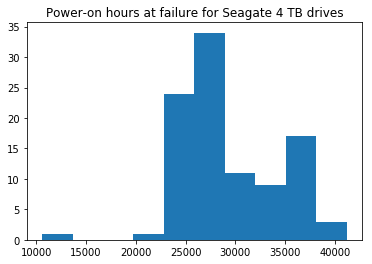

In [42]:
plt.hist(power_on_hours_at_failure)
plt.title("Power-on hours at failure for Seagate 4 TB drives")

In [130]:
len(power_on_hours_at_failure)

100

In [144]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(power_on_hours_at_failure + non_failed_power_on_hours, 
        [1]*len(power_on_hours_at_failure) + [0]*len(non_failed_power_on_hours))

<lifelines.KaplanMeierFitter: fitted with 4497 observations, 4397 censored>

In [151]:
np.mean(non_failed_power_on_hours)

27323.604730498068

(array([   6.,   10.,   20.,   12.,    9.,   18.,   32.,  876., 1716.,
        1698.]),
 array([ 5869. ,  8311.8, 10754.6, 13197.4, 15640.2, 18083. , 20525.8,
        22968.6, 25411.4, 27854.2, 30297. ]),
 <a list of 10 Patch objects>)

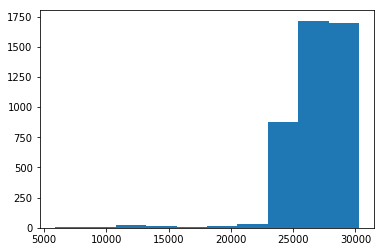

In [153]:
plt.hist(non_failed_power_on_hours)

In [147]:
np.mean(power_on_hours_at_failure)

29167.63

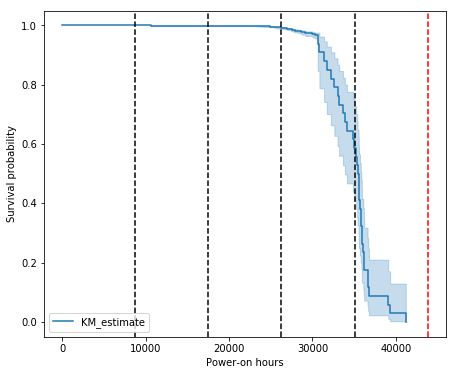

In [148]:
fig, ax = plt.subplots(1, figsize=(6 * 1.2, 6))
ax = kmf.plot(ax=ax)

ax.set_ylabel("Survival probability")
ax.set_xlabel("Power-on hours")

ax.axvline(1*8760, linestyle='--', color='k')
ax.axvline(2*8760, linestyle='--', color='k')
ax.axvline(3*8760, linestyle='--', color='k')
ax.axvline(4*8760, linestyle='--', color='k')
ax.axvline(5*8760, linestyle='--', color='r')

In [149]:
max(power_on_hours_at_failure)

41186.0

In [150]:
max(non_failed_power_on_hours)

30297.0

In [6]:
data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-12-31,Z305B2QN,ST4000DM000,4000787030016,0,111,35837176,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-31,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83,199061960,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-31,ZJV0XJQ3,ST12000NM0007,12000138625024,0,84,230661000,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-12-31,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81,132985536,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-12-31,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100,0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
seagate_4tb.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-12-31,Z305B2QN,ST4000DM000,4000787030016,0,111,35837176,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2018-12-31,Z305DEMG,ST4000DM000,4000787030016,0,119,207989736,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2018-12-31,Z3023VGH,ST4000DM000,4000787030016,0,116,109721928,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,2018-12-31,Z306WYZZ,ST4000DM000,4000787030016,0,120,239189728,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2018-12-31,Z3026Z8H,ST4000DM000,4000787030016,0,119,226475688,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


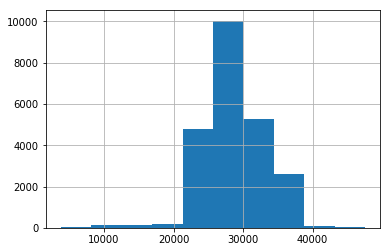

In [154]:
seagate_4tb.smart_9_raw.hist()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
